# Simple Linear Regression 

## Problem Statement :
This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale? Since we are trying to solve a simple linear regression, we are taking only one independent variable i.e. TV


In [22]:
# necessary Imports of library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import pylab as py 

In [35]:
# Reading the file 
data= pd.read_csv('Advertising.csv') 

data = data.drop(labels=['radio','newspaper'],axis=1)
# After reading the data we will have to explore the data (EDA)
#Start of exploration -- will end at commnet # end of exploration
# see if the data has been read or not 
data.head()

,Unnamed: 0,TV,sales
0,1,230.1,22.1
1,2,44.5,10.4
2,3,17.2,9.3
3,4,151.5,18.5
4,5,180.8,12.9


In [19]:
# to know the shape i.e. row and columns in data
data.shape

(200, 3)

In [20]:
# to get basic information about data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
sales         200 non-null float64
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [21]:
# As per the result above the column is not-null column . 
#However let's check it
data.isna().sum()

Unnamed: 0    0
TV            0
sales         0
dtype: int64

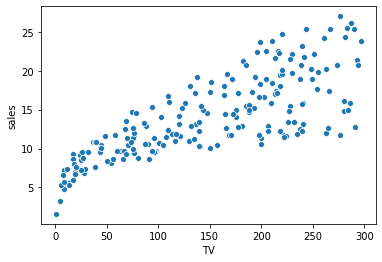

In [41]:
# to draw scatter plot between dependent and independent variable
# to see the linear relationship
sns.scatterplot(x='TV', y='sales',data=data)

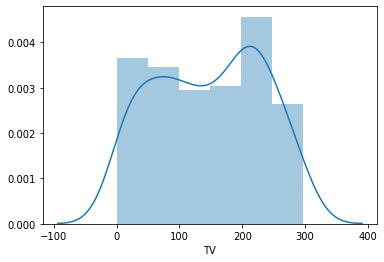

In [42]:
# the result above shows there is linear dependency between TV numbers 
#and sales number . Let's check the normality of data (independent variable)
sns.distplot(data['TV'], kde=True)

##### Above result doesnot show it to be perfectly normal but it is nearly normal distribution with two peaks 

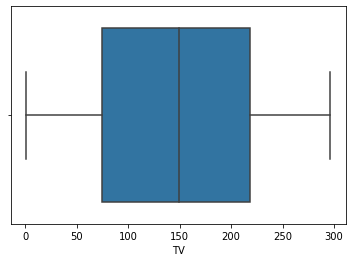

In [43]:
#let's check to find outlier through boxplot 
sns.boxplot(data['TV'])

##### Seing the above box plot , since no data is outside whisker's (lower limit and upper limit) . Multicollienarity test is not rquired as there are not multiple . Auto-collinearity test is also not required as it is not a time series data. 


In [62]:
#EDA is complete , Lets start building the model
feature_cols = ['TV']
x= data[feature_cols]
y=data['sales']

# Below code of line is to build linear regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)



7.032593549127695
[0.04753664]


#### From the above result the equation of model can be writen as :   
#### Y = 7.032593549127695 + 0.04753664* X . Now Y can be predicted from given X value using above model (linear equation)


In [64]:
# Predicting using above model
lm.predict([[50]])

array([9.40942557])

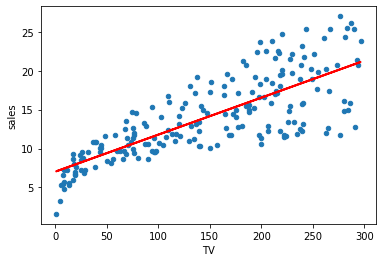

In [73]:
preds = [lm.predict([[x]]) for x in data['TV']]
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales')
# then, plot the least squares line
plt.plot(data['TV'], preds, c='red', linewidth=2)

In [81]:
# Accuracy of the model
lm.score(data[['TV']], data[['sales']])


0.611875050850071